In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import pytraj as pt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
traj_dir='//Users/mingyu/analysis/COX-2_empty/'
traj = pt.iterload('COX-2_0-300ns_strip.nc', 'COX-2_strip.parm7',stride=1)
pt.superpose(traj, ref=0)

pytraj.TrajectoryIterator, 6000 frames: 
Size: 2.388239 (GB)
<Topology: 17808 atoms, 1108 residues, 2 mols, PBC with box type = orthorhombic>
           

In [3]:
rmsd_dimer1 = pt.rmsd(traj,ref=0, mask=':1-554@C,N,O')
rmsd_dimer2 = pt.rmsd(traj,ref=0, mask=':555-1108@C,N,O')
rg_dimer1 = pt.radgyr(traj, mask=':1-554')
rg_dimer2 = pt.radgyr(traj, mask=':555-1108')

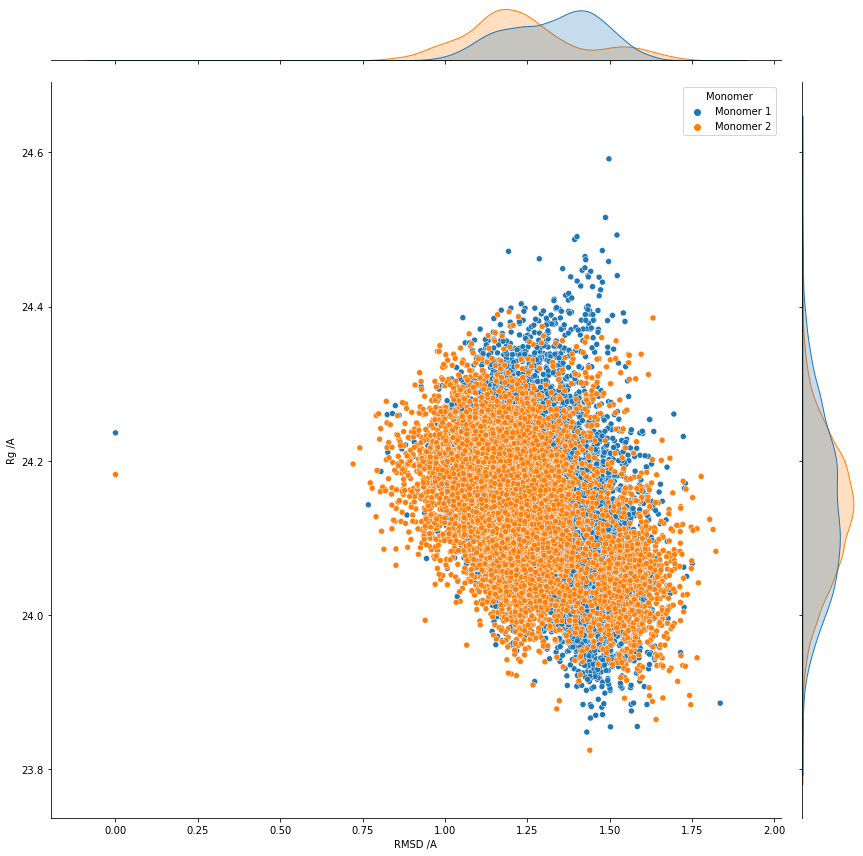

In [5]:
df1 = pd.DataFrame({'RMSD /A': rmsd_dimer1, 'Rg /A':rg_dimer1, 'Monomer': 'Monomer 1'}, index=[np.arange(0,6000)])
df2 = pd.DataFrame({'RMSD /A': rmsd_dimer2, 'Rg /A':rg_dimer2, 'Monomer': 'Monomer 2'}, index=[np.arange(6000,12000)])
frames = [df1, df2]
result = pd.concat(frames)
sns.jointplot(data=result, x="RMSD /A", y="Rg /A", hue="Monomer", height=12, ratio=10, space=0.4)